In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
import joblib

In [35]:
# Load Data
df1 = pd.read_csv("D:/cdrive/desktop/DIVYA/CAREER/guvi/PROJECT/TOURISM/16-03/debug6.csv")


In [37]:
# General information about the dataset 
# including data types and missing information 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              52930 non-null  int64 
 1   visityear           52930 non-null  int64 
 2   visitMonth          52930 non-null  int64 
 3   visitmodeID         52930 non-null  int64 
 4   attractionid        52930 non-null  int64 
 5   rating              52930 non-null  int64 
 6   attraction          52930 non-null  object
 7   AttractionAddress   52930 non-null  object
 8   AttractionCityId    52930 non-null  int64 
 9   attractiontypeid    52930 non-null  int64 
 10  contenentid         52930 non-null  int64 
 11  regionid            52930 non-null  int64 
 12  countryid           52930 non-null  int64 
 13  cityid              52930 non-null  object
 14  attractiontype      52930 non-null  object
 15  visitmode           52930 non-null  object
 16  UserCity            52

In [39]:
print((df1 == "\\N").sum())  # Count \N occurrences per column
print(df1.isin(["\\N"]).sum().sum())  #

userid                0
visityear             0
visitMonth            0
visitmodeID           0
attractionid          0
rating                0
attraction            0
AttractionAddress     0
AttractionCityId      0
attractiontypeid      0
contenentid           0
regionid              0
countryid             0
cityid                8
attractiontype        0
visitmode             0
UserCity              8
UserCountry           0
UserRegion            0
UserContinent         0
AttractionCityName    0
AttractionCountry     0
AttractionRegion      0
dtype: int64
16


In [43]:
# Replace "\\N" with NaN (modify df1 in place)
df1['cityid'] = df1['cityid'].replace("\\N", np.nan)

# Drop rows with NaN in 'cityid'
df1 = df1.dropna(subset=['cityid'])

# Reset index
df1 = df1.reset_index(drop=True)

# Verify if "\\N" is gone
print((df1 == "\\N").sum())  # Count \N occurrences per column
print(df1.isin(["\\N"]).sum().sum())  # Count total occurrences

userid                0
visityear             0
visitMonth            0
visitmodeID           0
attractionid          0
rating                0
attraction            0
AttractionAddress     0
AttractionCityId      0
attractiontypeid      0
contenentid           0
regionid              0
countryid             0
cityid                0
attractiontype        0
visitmode             0
UserCity              0
UserCountry           0
UserRegion            0
UserContinent         0
AttractionCityName    0
AttractionCountry     0
AttractionRegion      0
dtype: int64
0


In [77]:
df1["cityid"] = pd.to_numeric(df1["cityid"], errors="coerce").fillna(0).astype(int)

In [45]:
##Checking for null values
df1.isnull().sum().any()

False

In [47]:
##Getting an ida about the duplicates
df1.duplicated().sum()


3722

In [49]:
##dropping the duplicates
df1=df1.drop_duplicates()

In [51]:
##Getting an ida about the duplicates
df1.duplicated().sum()
##0 indicates there are no duplicate values

0

In [53]:
df1.describe()

,userid,visityear,visitMonth,visitmodeID,attractionid,rating,AttractionCityId,attractiontypeid,contenentid,regionid,countryid
count,49200.000000,49200.000000,49200.000000,49200.000000,49200.000000,49200.000000,49200.000000,49200.000000,49200.00000,49200.000000,49200.000000
mean,44870.876280,2016.323984,6.617358,2.936179,748.524878,4.155752,1.233516,58.857500,3.60187,14.549329,106.482846
std,25128.035978,1.743272,3.382817,0.996280,200.790624,0.975830,0.629048,28.387726,1.07356,4.185918,35.732856
min,14.000000,2013.000000,1.000000,1.000000,369.000000,1.000000,1.000000,2.000000,1.00000,0.000000,1.000000
25%,23263.000000,2015.000000,4.000000,2.000000,640.000000,4.000000,1.000000,34.000000,3.00000,13.000000,93.000000
50%,45321.000000,2016.000000,7.000000,3.000000,737.000000,4.000000,1.000000,63.000000,4.00000,15.000000,109.000000
75%,66561.500000,2018.000000,9.000000,4.000000,824.000000,5.000000,1.000000,76.000000,5.00000,17.000000,121.000000
max,88190.000000,2022.000000,12.000000,5.000000,1297.000000,5.000000,3.000000,93.000000,5.00000,21.000000,164.000000


In [ ]:
'''
From the data it isinferred that
The visit year is between 2013-2022
Mean is greater than std deviation, so the data is left skewed
The most visited month is December and least visited is January
Most of the places we have taken for rating prediction has average of 4.1
'''


In [55]:
##creating correlation matrix only for numeric columns
numeric_df = df1.select_dtypes(include='number')  # Keep only numeric columns
correlation_matrix = numeric_df.corr()  # Compute correlation matrix
print(correlation_matrix)

                    userid  visityear  visitMonth  visitmodeID  attractionid  \
userid            1.000000  -0.009173   -0.004389     0.002560      0.048973   
visityear        -0.009173   1.000000   -0.158356    -0.027229     -0.083340   
visitMonth       -0.004389  -0.158356    1.000000    -0.010334      0.016611   
visitmodeID       0.002560  -0.027229   -0.010334     1.000000      0.100922   
attractionid      0.048973  -0.083340    0.016611     0.100922      1.000000   
rating           -0.012968  -0.006663    0.020209     0.003493      0.049765   
AttractionCityId  0.062200  -0.037927    0.008713     0.113651      0.821724   
attractiontypeid -0.007658  -0.054101    0.017016     0.016154      0.326260   
contenentid      -0.036247   0.022766    0.015787    -0.073242     -0.070185   
regionid         -0.017597   0.028034    0.023302    -0.065812     -0.046148   
countryid        -0.016285   0.028049    0.024933    -0.064081     -0.038881   

                    rating  AttractionC

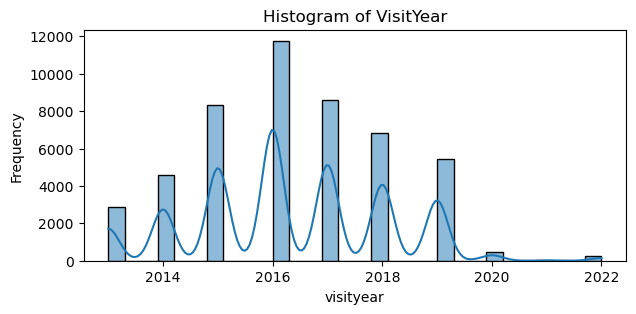

In [57]:
##Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7, 3))
sns.histplot(df1['visityear'], bins = 30, kde = True)
plt.title('Histogram of VisitYear')
plt.xlabel('visityear')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''
2016 has maximum number of visitors
Data has outliers
'''


C:\Users\Divya\AppData\Local\Temp\ipykernel_19636\2348237008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'visityear', y = 'countryid', data = df1, palette = 'Set1')


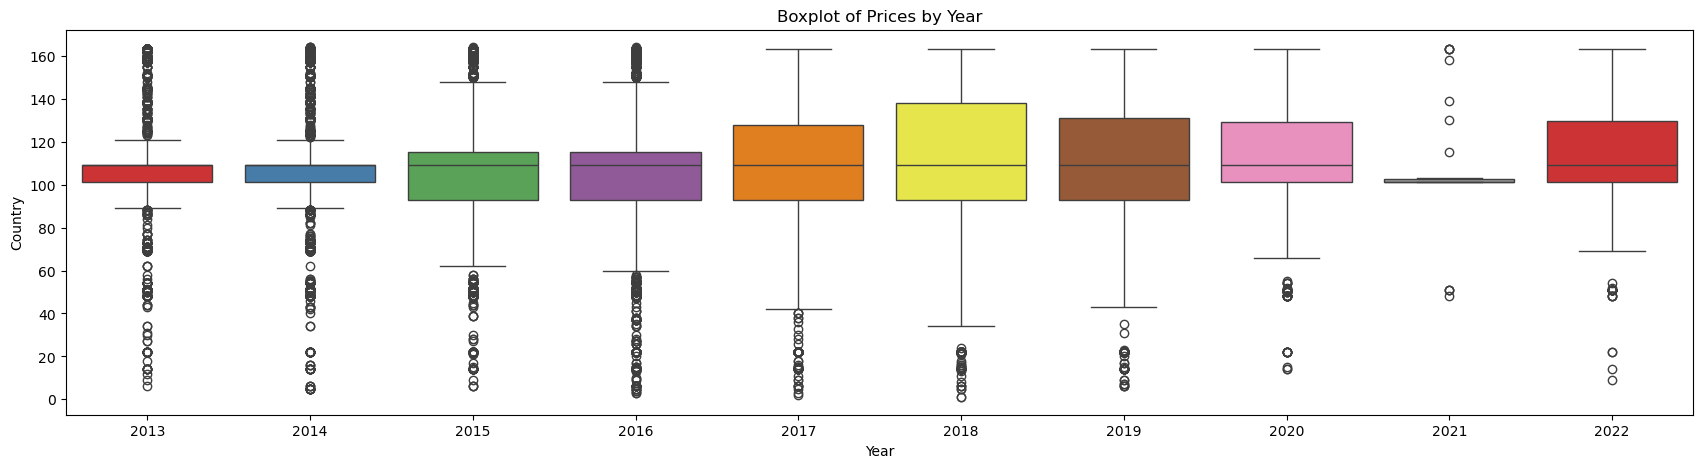

In [59]:
# Data Visualization : Boxplot of prices by year 
plt.figure(figsize = (21, 5))
sns.boxplot(x = 'visityear', y = 'countryid', data = df1, palette = 'Set1')
plt.title('Boxplot of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

In [ ]:
'''
Each year contains significant outliers of data
The number of visitors has increased significantly from 2013-2019
'''


In [79]:
# Drop unnecessary columns
df1.drop(columns=["attraction", "AttractionAddress","userid","attractiontype",], inplace=True, errors="ignore")


In [81]:
# Convert categorical features to numerical using Label Encoding
categorical_cols = [
    "UserContinent", "UserRegion", "UserCountry", "UserCity",
    "visitmode", "AttractionCountry", "AttractionRegion"
]
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col].astype(str))  # Convert to string before encoding
    encoders[col] = le  # Save encoder for later decoding if needed

# Standardize numerical features
scaler = StandardScaler()
df1[["visityear", "visitMonth"]] = scaler.fit_transform(df1[["visityear", "visitMonth"]])

# Define Features (X) and Target (y)
X = df1.drop(columns=["rating"])  # Features
y = df1["rating"]  # Target variable


In [83]:
# Split into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
# Train a Regression Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [87]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [89]:
# Model Evaluation - 
# Testing performance 
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.9747969819534803
Testing R2 Score : -0.0008518514506490327

Training RMSE : 0.45353222786021236
Training R2 Score : 0.784147493670545


In [ ]:
##It is observed to be overfitted model since it performs well in training data but not in testing data

In [91]:
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')


In [93]:
# Remove Outliers Using IQR Method
def remove_outliers(X, y):
    Q1 = y.quantile(0.25)
    Q3 = y.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (y >= lower_bound) & (y <= upper_bound)
    return X[mask], y[mask]

# Apply Outlier Removal
X_clean, y_clean = remove_outliers(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Scale Data (Optional, XGBoost handles raw data well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Convert back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [95]:
# Define & Train LightGBM Model
model = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 36839, number of used features: 17
[LightGBM] [Info] Start training from score 4.328049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [97]:
# Evaluate Model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")

Training RMSE: 0.6859
Testing RMSE: 0.6998
Training R² Score: 0.1115
Testing R² Score: 0.0814


In [ ]:
'''
From the data it is inferred that R2 value is 0.08.
The current regression model has limited predictive power, it is not necessarily a failure. 
low R² values are common because user preferences are influenced by many unobservable factors 
while for recommendation system the ideal value is 01.-02
RMSE value is 0.694
User ratings are subjective and influenced by personal preferences, making perfect predictions unrealistic.
In real-world recommendation systems, RMSE values in the range of 0.6 to 1.0 on a 1-5 scale are common.
An RMSE of 0.7 on a 1-5 scale is moderate—acceptable but not highly accurate.
It indicates that the model captures some patterns but has room for improvement.
Reducing RMSE closer to 0.5 would lead to better recommendations and a more reliable system.
'''
